# Data Collection & Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/thyroidDF.csv")

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [ ]:
data['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [ ]:
data.shape

(9172, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [ ]:
import pandas as pd
data = pd.read_csv("/content/thyroidDF.csv")
data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','referral_source','patient_id','T4U_measured'],axis=1,inplace=True)

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,-
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,-
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,11.0,-
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,-
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,S


In [ ]:
data['target']

0       -
1       -
2       -
3       -
4       S
       ..
9167    -
9168    -
9169    I
9170    -
9171    -
Name: target, Length: 9172, dtype: object

In [ ]:
diagnoses = {'A': 'hyperthyroid conditions',
            'B': 'hyperthyroid conditions',
            'C': 'hyperthyroid conditions',
            'D': 'hyperthyroid conditions',
            'E': 'hypothyroid conditions',
            'F': 'hypothyroid conditions',
            'G': 'hypothyroid conditions',
            'H': 'hypothyroid conditions',
            'I': 'binding protein',
            'J': 'binding protein',
            'K': 'general health',
            'L': 'replacement therapy',
            'M': 'replacement therapy',
            'N': 'replacement therapy',
            '0': 'antithyroid treatment',
            'P': 'antithyroid treatment',
            'Q': 'antithyroid treatment',
            'R': 'miscellaneous',
            'S': 'miscellaneous',
            'T': 'miscellaneous'}
data['target']=data['target'].map(diagnoses)

In [ ]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,NaN
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,NaN
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,11.0,NaN
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,NaN
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,miscellaneous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,64.0,0.83,77.0,NaN,NaN
9168,22,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,91.0,0.92,99.0,NaN,NaN
9169,69,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,113.0,1.27,89.0,NaN,binding protein
9170,47,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,75.0,0.85,88.0,NaN,NaN


In [ ]:
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     842
T3                     2604
TT4                     442
T4U                     809
FTI                     802
TBG                    8823
target                 6949
dtype: int64

In [ ]:
data.dropna(subset=['target'],inplace=True)

In [ ]:
data['target'].value_counts()

hypothyroid conditions     593
general health             436
binding protein            376
replacement therapy        336
miscellaneous              281
hyperthyroid conditions    182
antithyroid treatment       19
Name: target, dtype: int64

In [ ]:
data['target'].isnull().sum()

0

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,miscellaneous
18,63,F,t,f,f,t,f,f,f,f,...,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN,hypothyroid conditions
32,41,M,f,f,f,f,f,f,f,f,...,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN,miscellaneous
33,71,F,t,f,f,f,f,f,f,f,...,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN,binding protein
39,55,F,t,f,f,f,f,f,f,t,...,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN,replacement therapy


In [ ]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2223.000000,2073.000000,1629.000000,2126.000000,2045.000000,2046.000000,98.000000
mean,52.859199,14.965538,1.963634,116.910470,1.013501,120.928416,47.717347
std,19.669100,46.343358,1.457743,60.203955,0.281001,70.903791,32.398750
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,9.299999
25%,36.000000,0.250000,1.000000,77.000000,0.850000,83.000000,32.000000
50%,56.000000,2.000000,1.700000,109.500000,0.960000,109.000000,36.000000
75%,69.500000,8.799999,2.500000,156.000000,1.120000,157.000000,46.750000
max,95.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


In [ ]:
data[data.age>100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target


In [ ]:
data['age']=np.where((data.age>100), np.nan, data.age)

In [ ]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
4,32.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,miscellaneous
18,63.0,F,t,f,f,t,f,f,f,f,...,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN,hypothyroid conditions
32,41.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN,miscellaneous
33,71.0,F,t,f,f,f,f,f,f,f,...,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN,binding protein
39,55.0,F,t,f,f,f,f,f,f,t,...,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN,replacement therapy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.810000,NaN,31.0,0.55,56.0,NaN,general health
9157,60.0,M,f,f,t,f,f,f,f,f,...,f,f,f,0.180000,NaN,28.0,0.87,32.0,NaN,general health
9158,64.0,M,f,f,f,f,f,f,f,t,...,f,f,f,NaN,NaN,44.0,0.53,83.0,NaN,binding protein
9162,36.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,84.0,1.26,67.0,NaN,binding protein


Splitting the data values as x and y

In [ ]:
x=data.iloc[:,0:-1]
y= data.iloc[:,-1]

In [ ]:
data.isnull().sum()

age                       0
sex                      90
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     150
T3                      594
TT4                      97
T4U                     178
FTI                     177
TBG                    2125
target                    0
dtype: int64

In [ ]:
x['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [ ]:
x['sex'].replace(np.nan, 'F', inplace=True)

In [ ]:
x['sex'].value_counts()

F    1687
M     536
Name: sex, dtype: int64

In [ ]:
x.isnull().sum()

age                       0
sex                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     150
T3                      594
TT4                      97
T4U                     178
FTI                     177
TBG                    2125
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 4 to 9169
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2223 non-null   float64
 1   sex                  2133 non-null   object 
 2   on_thyroxine         2223 non-null   object 
 3   query_on_thyroxine   2223 non-null   object 
 4   on_antithyroid_meds  2223 non-null   object 
 5   sick                 2223 non-null   object 
 6   pregnant             2223 non-null   object 
 7   thyroid_surgery      2223 non-null   object 
 8   I131_treatment       2223 non-null   object 
 9   query_hypothyroid    2223 non-null   object 
 10  query_hyperthyroid   2223 non-null   object 
 11  lithium              2223 non-null   object 
 12  goitre               2223 non-null   object 
 13  tumor                2223 non-null   object 
 14  hypopituitary        2223 non-null   object 
 15  psych                2223 non-null   o

In [ ]:
x['age']=x['age'].astype('float')
x['TSH']=x['TSH'].astype('float')
x['T3']=x['T3'].astype('float')
x['TT4']=x['TT4'].astype('float')
x['T4U']=x['T4U'].astype('float')
x['FTI']=x['FTI'].astype('float')
x['TBG']=x['TBG'].astype('float')

Converting Categorical to numerical values

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
ordinal_encoder = OrdinalEncoder(dtype = 'int64')
x.iloc[:, 1:16] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])

<ipython-input-36-d44f8bcef9c7>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:, 1:16] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])


In [ ]:
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.000000,NaN,48.0,1.02,47.0,NaN
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,1.6,39.0,1.00,39.0,NaN
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,NaN,126.0,1.38,91.0,NaN
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,NaN


In [ ]:
x.replace(np.nan, '0', inplace=True)
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.0,0,48.0,1.02,47.0,0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.05,1.6,39.0,1.0,39.0,0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.05,0,126.0,1.38,91.0,0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0


In [ ]:
lable_encoder = LabelEncoder()
y_dt= lable_encoder.fit_transform(y)

In [ ]:
y=pd.DataFrame(y_dt, columns=['target'])
y

,target
0,5
1,4
2,5
3,1
4,6
...,...
2218,2
2219,2
2220,1
2221,1


In [ ]:
y.value_counts(normalize=True)

target
4         0.266757
2         0.196131
1         0.169141
6         0.151147
5         0.126406
3         0.081871
0         0.008547
dtype: float64

# Exploration Data Analysis

Checking the Correlation

<ipython-input-42-97e8ff478756>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = x.corr()


<Axes: >

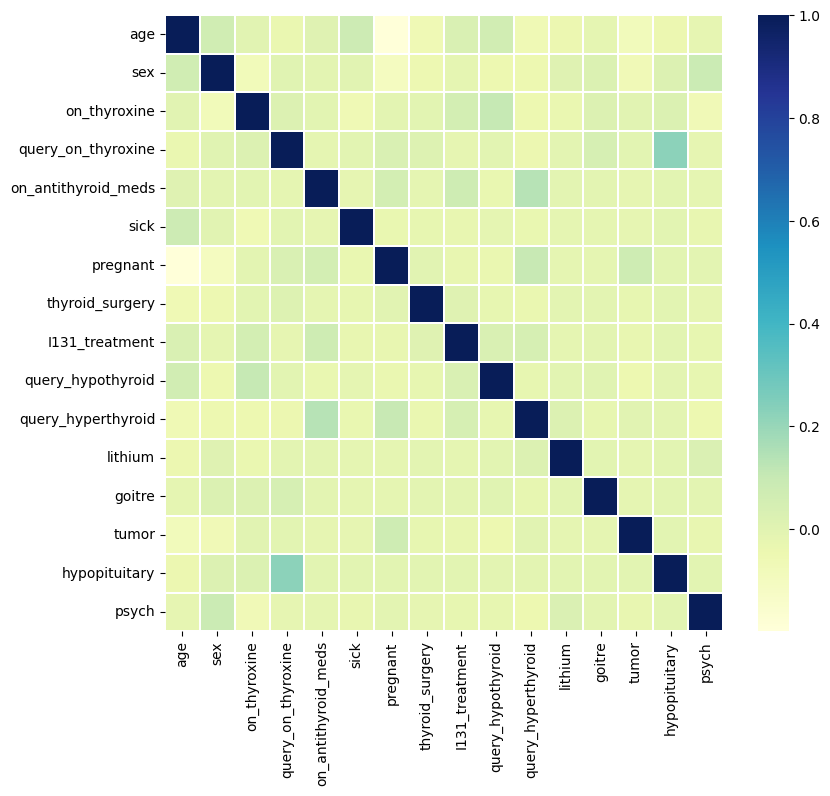

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = x.corr()
f,ax = plt.subplots(figsize =(9,8))
sns.heatmap(corrmat, ax= ax, cmap ="YlGnBu", linewidths = 0.1)

Splitting the train and test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
y_train.value_counts()

target
4         472
2         360
1         298
6         269
5         226
3         138
0          15
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0,k_neighbors=1)
x_bal,y_bal=os.fit_resample(x_train,y_train)
x_test_bal,y_test_bal=os.fit_resample(x_test,y_test)

In [ ]:
x_bal

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,48.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,207.0,1.66,125.0,0.0
1,72.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,13.7,0.0,67.0,0.75,89.0,0.0
2,31.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.8,3.7,109.0,1.62,67.0,0.0
3,14.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,155.0,0.93,166.0,25.0
4,54.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3.3,0.7,76.0,0.72,105.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,72.621678,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.068916,0.0,183.108392,0.924867,198.134965,0.0
3300,63.726045,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.225344,2.258907,202.958842,0.934109,217.136977,0.0
3301,61.000000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.073103,0.362554,150.842368,0.851576,177.369471,0.0
3302,58.962148,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.081666,0.017412,125.068134,0.780303,161.015141,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_bal = sc.fit_transform(x_bal)
x_test_bal= sc.transform(x_test_bal)

In [ ]:
x_bal

array([[-0.19378269, -0.43366098, -0.4237673 , ...,  1.97247536,
         0.10098737, -0.18730348],
       [ 1.06590801, -0.43366098, -0.4237673 , ..., -0.47069577,
        -0.33015118, -0.18730348],
       [-1.08606361, -0.43366098, -0.4237673 , ...,  1.86508322,
        -0.59362474, -0.18730348],
       ...,
       [ 0.48854977, -0.43366098,  2.35978568, ..., -0.19798331,
         0.72816787, -0.18730348],
       [ 0.38158878, -0.43366098,  2.35978568, ..., -0.38933866,
         0.53230725, -0.18730348],
       [-1.23565244, -0.43366098,  2.35978568, ...,  0.55865798,
        -0.19434248, -0.18730348]])

In [ ]:
x_test_bal

array([[-0.98108938, -0.43366098, -0.4237673 , ..., -0.28275953,
        -0.06667762, -0.18730348],
       [ 1.06590801, -0.43366098, -0.4237673 , ..., -0.49754381,
         4.41237289, -0.18730348],
       [-0.40373114,  2.30594875, -0.4237673 , ...,  0.09311295,
        -0.89302651, -0.18730348],
       ...,
       [ 0.12750926, -0.43366098,  2.35978568, ..., -0.24411648,
         1.28952497, -0.18730348],
       [ 0.12047491, -0.43366098,  2.35978568, ..., -0.07171349,
         0.53743196, -0.18730348],
       [ 0.47883698, -0.43366098,  2.35978568, ...,  0.16271716,
         0.7485795 , -0.18730348]])

In [ ]:
y_bal.value_counts()

target
0         472
1         472
2         472
3         472
4         472
5         472
6         472
dtype: int64

In [ ]:
columns=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH','T3','TT4','T4U','FTI','TBG']

In [ ]:
x_test_bal= pd.DataFrame(x_test_bal,columns=columns)

In [ ]:
x_bal= pd.DataFrame(x_bal,columns=columns)

In [ ]:
x_bal

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.193783,-0.433661,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.322733,-1.014991,1.340750,1.972475,0.100987,-0.187303
1,1.065908,-0.433661,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,0.056471,-1.014991,-0.709600,-0.470696,-0.330151,-0.187303
2,-1.086064,-0.433661,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.272911,1.290950,-0.094495,1.865083,-0.593625,-0.187303
3,-1.978345,-0.433661,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.322733,-1.014991,0.579192,0.012569,0.592006,1.862310
4,0.121140,-0.433661,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,8.708456,-0.231392,-0.578732,-0.577792,-0.551240,-0.138534,-0.187303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,1.098538,-0.433661,2.359786,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.320825,-1.014991,0.990849,-0.001212,0.976857,-0.187303
3300,0.631632,-0.433661,2.359786,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.316496,0.392821,1.281566,0.023602,1.204426,-0.187303
3301,0.488550,-0.433661,2.359786,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.320710,-0.789038,0.518302,-0.197983,0.728168,-0.187303
3302,0.381589,-0.433661,2.359786,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.320473,-1.004140,0.140829,-0.389339,0.532307,-0.187303


In [ ]:
y_bal

,target
0,1
1,4
2,1
3,3
4,2
...,...
3299,6
3300,6
3301,6
3302,6


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rfr = RandomForestClassifier()
rfr.fit(x_bal,y_bal)
y_pred = rfr.predict(x_test_bal)
accuracy_score(y_test_bal,y_pred)
x_bal.shape,y_bal.shape,x_test_bal.shape,y_test_bal.shape               

<ipython-input-56-9bf3ba303cb1>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_bal,y_bal)


((3304, 22), (3304, 1), (847, 22), (847, 1))

In [ ]:
test_score=accuracy_score(y_test_bal,y_pred)
test_score

0.9598583234946871

In [ ]:
train_score = accuracy_score(y_bal,rfr.predict(x_bal))
train_score

1.0

Performing Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(rfr,x_bal,y_bal, scoring='accuracy')

feature: age                  score: 0.0
feature: sex                  score: 0.0
feature: on_thyroxine         score: 0.0
feature: query_on_thyroxine   score: 0.0
feature: on_antithyroid_meds  score: 0.0
feature: sick                 score: 0.0001210653753026758
feature: pregnant             score: 0.0002421307506053516
feature: thyroid_surgery      score: 0.0003026634382566895
feature: I131_treatment       score: 0.000605326876513268
feature: query_hypothyroid    score: 0.0007869249394672817
feature: query_hyperthyroid   score: 0.0010290556900726332
feature: lithium              score: 0.0017554479418885993
feature: goitre               score: 0.007142857142857162
feature: tumor                score: 0.009745762711864425
feature: hypopituitary        score: 0.030266343825665863
feature: psych                score: 0.047760290556900745
feature: TSH                  score: 0.07675544794188864
feature: T3                   score: 0.07717917675544791
feature: TT4                  score: 

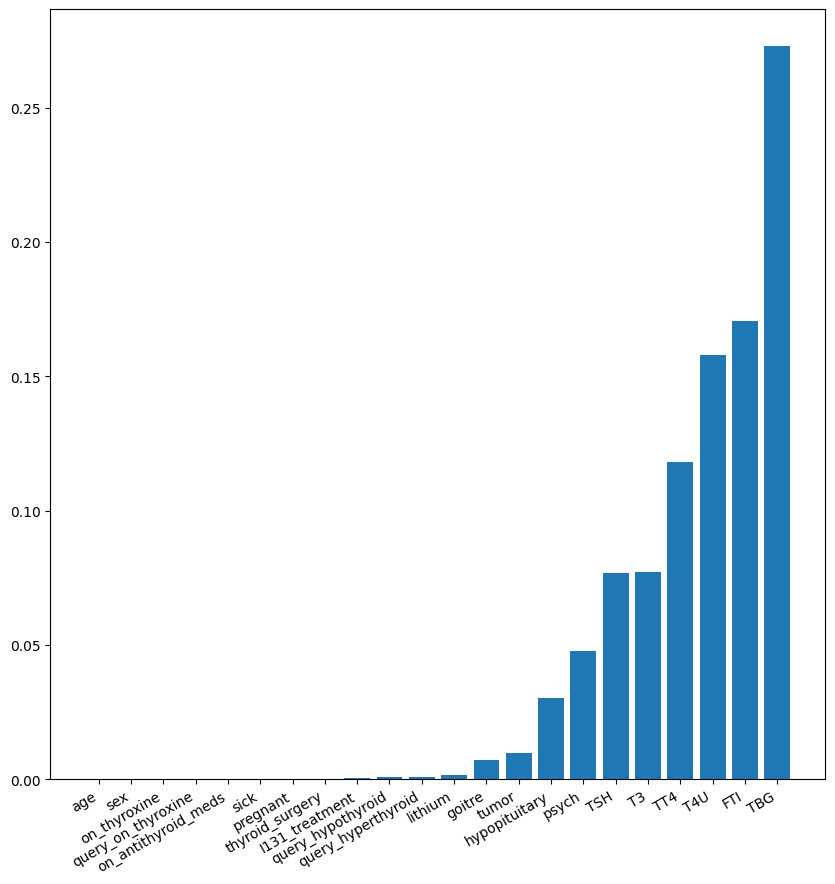

In [ ]:
feature_importance=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH','T3','TT4','T4U','FTI','TBG']
importance = results.importances_mean
importance = np.sort(importance)
for i,v in enumerate(importance):
  i=feature_importance[i]
  print('feature: {:<20} score: {}'. format(i,v))
plt.figure(figsize=(10,10))
plt.bar(feature_importance, height = importance)
plt.xticks(rotation=30, ha='right')
plt.show()

In [ ]:
#x_bal.drop(['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH','T3','TT4','T4U','FTI','TBG'], axis=1,inplace=True)

In [ ]:
#x_test_bal.drop(['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH','T3','TT4','T4U','FTI','TBG'],axis=1,inplace=True)

In [ ]:
x_bal.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.193783,-0.433661,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.322733,-1.014991,1.340750,1.972475,0.100987,-0.187303
1,1.065908,-0.433661,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,0.056471,-1.014991,-0.709600,-0.470696,-0.330151,-0.187303
2,-1.086064,-0.433661,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.272911,1.290950,-0.094495,1.865083,-0.593625,-0.187303
3,-1.978345,-0.433661,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.322733,-1.014991,0.579192,0.012569,0.592006,1.862310
4,0.121140,-0.433661,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,8.708456,-0.231392,-0.578732,-0.577792,-0.551240,-0.138534,-0.187303


In [ ]:
x_test_bal.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.981089,-0.433661,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,3.557090,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.079157,0.231463,-0.358111,-0.282760,-0.066678,-0.187303
1,1.065908,-0.433661,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.319965,4.344763,3.566845,-0.497544,4.412373,-0.187303
2,-0.403731,2.305949,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,19.134030,-0.131306,-0.0174,-0.114831,-0.298099,-1.014991,-1.105024,0.093113,-0.893027,-0.187303
3,1.013421,-0.433661,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.306126,-0.391764,-0.402047,0.039417,-0.270271,-0.187303
4,-0.981089,2.305949,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,3.557090,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,1.144260,-0.391764,-1.222187,-0.390152,-0.905003,-0.187303


# Model Building

RandomForest Model-1

In [ ]:
rfr1 = RandomForestClassifier()
rfr1.fit(x_bal,y_bal)
y_pred=rfr1.predict(x_test_bal)

<ipython-input-65-0f47a2fbaab0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr1.fit(x_bal,y_bal)


In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      0.95      0.97       121
           2       0.94      0.98      0.96       121
           3       0.94      0.91      0.92       121
           4       0.99      0.99      0.99       121
           5       0.87      0.91      0.89       121
           6       0.99      0.98      0.99       121

    accuracy                           0.96       847
   macro avg       0.96      0.96      0.96       847
weighted avg       0.96      0.96      0.96       847



In [ ]:
train_score = accuracy_score(y_bal,rfr1.predict(x_bal))

In [ ]:
train_score

1.0

XGBClassfier Model-2

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_bal,y_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred-xgb.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      0.95      0.97       121
           2       0.94      0.98      0.96       121
           3       0.94      0.91      0.92       121
           4       0.99      0.99      0.99       121
           5       0.87      0.91      0.89       121
           6       0.99      0.98      0.99       121

    accuracy                           0.96       847
   macro avg       0.96      0.96      0.96       847
weighted avg       0.96      0.96      0.96       847



In [ ]:
train_score = accuracy_score(y_bal, xgb.predict(x_bal))
train_score

1.0

SVC Model-3

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

sv= SVC()

In [ ]:
sv.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
y_pred = sv.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       121
           1       0.86      0.74      0.79       121
           2       0.75      0.88      0.81       121
           3       0.78      0.83      0.80       121
           4       0.84      0.60      0.70       121
           5       0.75      0.75      0.75       121
           6       0.91      0.97      0.94       121

    accuracy                           0.82       847
   macro avg       0.82      0.82      0.82       847
weighted avg       0.82      0.82      0.82       847



In [ ]:
train_score=accuracy_score(y_bal,sv.predict(x_bal))
train_score

0.8450363196125908

Grid_Search for RandomForest

In [ ]:
params={
    'n_estimators': [100,200,500],
    'criterion': ['gini','entropy'],
    'max_depth' : [x for x in range(1,20)]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rfr1, params, scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
grid_search.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 19, 'n_estimators': 500}

In [ ]:
rfr_gs=RandomForestClassifier(criterion= 'entropy', max_depth=16, n_estimators= 200)

In [ ]:
rfr_gs.fit(x_bal,y_bal)

<ipython-input-83-e295d669d733>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_gs.fit(x_bal,y_bal)


RandomForestClassifier(criterion='entropy', max_depth=16, n_estimators=200)

In [ ]:
y_pred=rfr_gs.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       121
           1       0.98      0.98      0.98       121
           2       0.96      0.98      0.97       121
           3       0.94      0.92      0.93       121
           4       0.99      0.99      0.99       121
           5       0.88      0.90      0.89       121
           6       0.99      0.98      0.99       121

    accuracy                           0.96       847
   macro avg       0.96      0.96      0.96       847
weighted avg       0.96      0.96      0.96       847



In [ ]:
train_score= accuracy_score(y_bal,rfr_gs.predict(x_bal))
train_score


1.0

Grid_Search for XGB

In [ ]:
params={
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster':['gbtree', 'gblinear'],
    'ganma': [0,0.5, 1],


    
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_xgb = GridSearchCV(xgb, params, scoring='accuracy',cv=3,n_jobs=-1)

In [ ]:
grid_xgb.fit(x_bal,y_bal)

[12:15:42] WARNING: ../src/learner.cc:767: 
Parameters: { "ganma" } are not used.



GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'ganma': [0, 0.5, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [ ]:
grid_xgb.best_params_

{'booster': 'gbtree', 'ganma': 0, 'learning_rate': 0.1, 'n_estimators': 200}

In [ ]:
xgb1=XGBClassifier(booster='gbtree', gamna= 0, learning_rate= 0.1, n_estimators= 500)

In [ ]:
xgb1.fit(x_bal,y_bal)

[12:15:51] WARNING: ../src/learner.cc:767: 
Parameters: { "gamna" } are not used.



XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gamna=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred= xgb1.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       121
           1       0.98      0.98      0.98       121
           2       0.95      0.98      0.97       121
           3       0.93      0.88      0.91       121
           4       0.99      0.98      0.98       121
           5       0.86      0.89      0.88       121
           6       0.99      0.98      0.98       121

    accuracy                           0.96       847
   macro avg       0.96      0.96      0.96       847
weighted avg       0.96      0.96      0.96       847



In [ ]:
train_score= accuracy_score(y_bal,xgb1.predict(x_bal))
train_score

1.0

# Performance Testing & Hyperparameter Tuning

 Grid_Search for SVC

In [ ]:
params = {
    'C' : [0.01, 1, 10,100, 1000],
    'kernel': ['rbf', 'linear'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
}

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

sv= SVC()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_svc = GridSearchCV(sv,params,scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
x_bal

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.193783,-0.433661,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.322733,-1.014991,1.340750,1.972475,0.100987,-0.187303
1,1.065908,-0.433661,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,0.056471,-1.014991,-0.709600,-0.470696,-0.330151,-0.187303
2,-1.086064,-0.433661,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.272911,1.290950,-0.094495,1.865083,-0.593625,-0.187303
3,-1.978345,-0.433661,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.322733,-1.014991,0.579192,0.012569,0.592006,1.862310
4,0.121140,-0.433661,-0.423767,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,8.708456,-0.231392,-0.578732,-0.577792,-0.551240,-0.138534,-0.187303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,1.098538,-0.433661,2.359786,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.320825,-1.014991,0.990849,-0.001212,0.976857,-0.187303
3300,0.631632,-0.433661,2.359786,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.316496,0.392821,1.281566,0.023602,1.204426,-0.187303
3301,0.488550,-0.433661,2.359786,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.320710,-0.789038,0.518302,-0.197983,0.728168,-0.187303
3302,0.381589,-0.433661,2.359786,-0.104957,-0.074012,-0.140546,-0.13829,-0.281129,-0.23,-0.234344,...,-0.052263,-0.131306,-0.0174,-0.114831,-0.320473,-1.004140,0.140829,-0.389339,0.532307,-0.187303


In [ ]:
grid_svc.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [ ]:
grid_svc.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
sv1=SVC(C =1000,gamma =1, kernel= 'rbf')

In [ ]:
sv1.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1000, gamma=1)

In [ ]:
y_pred= sv1.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.60      0.73       121
           1       0.85      0.78      0.81       121
           2       0.85      0.88      0.87       121
           3       0.76      0.69      0.72       121
           4       0.47      0.87      0.61       121
           5       0.85      0.65      0.74       121
           6       0.92      0.82      0.86       121

    accuracy                           0.76       847
   macro avg       0.81      0.76      0.76       847
weighted avg       0.81      0.76      0.76       847



In [ ]:
train_score= accuracy_score(y_bal,sv1.predict(x_bal))
train_score

0.9996973365617433

Saving the model as thyroid1_model.pkl

In [ ]:
import pickle
pickle.dump(sv1,open('thyroid_1_model.pkl','wb'))

In [ ]:
features = np.array([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])
#print(lable_encoder.inverse_transform(xgb1.predict(features)))

In [ ]:
type(features)

numpy.ndarray

In [ ]:
pickle.dump(lable_encoder,open('lable_encoder.pk1','wb'))

In [ ]:
data['target'].unique()

array(['miscellaneous', 'hypothyroid conditions', 'binding protein',
       'replacement therapy', 'general health', 'hyperthyroid conditions',
       'antithyroid treatment'], dtype=object)

In [ ]:
y['target'].unique()

array([5, 4, 1, 6, 2, 3, 0])